In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import numpy as np

In [2]:
# Load the GEBCO data
#gebco_data = xr.open_dataset('/Users/neilmalan/Documents/Bathy_data/GEBCO_2024.nc')

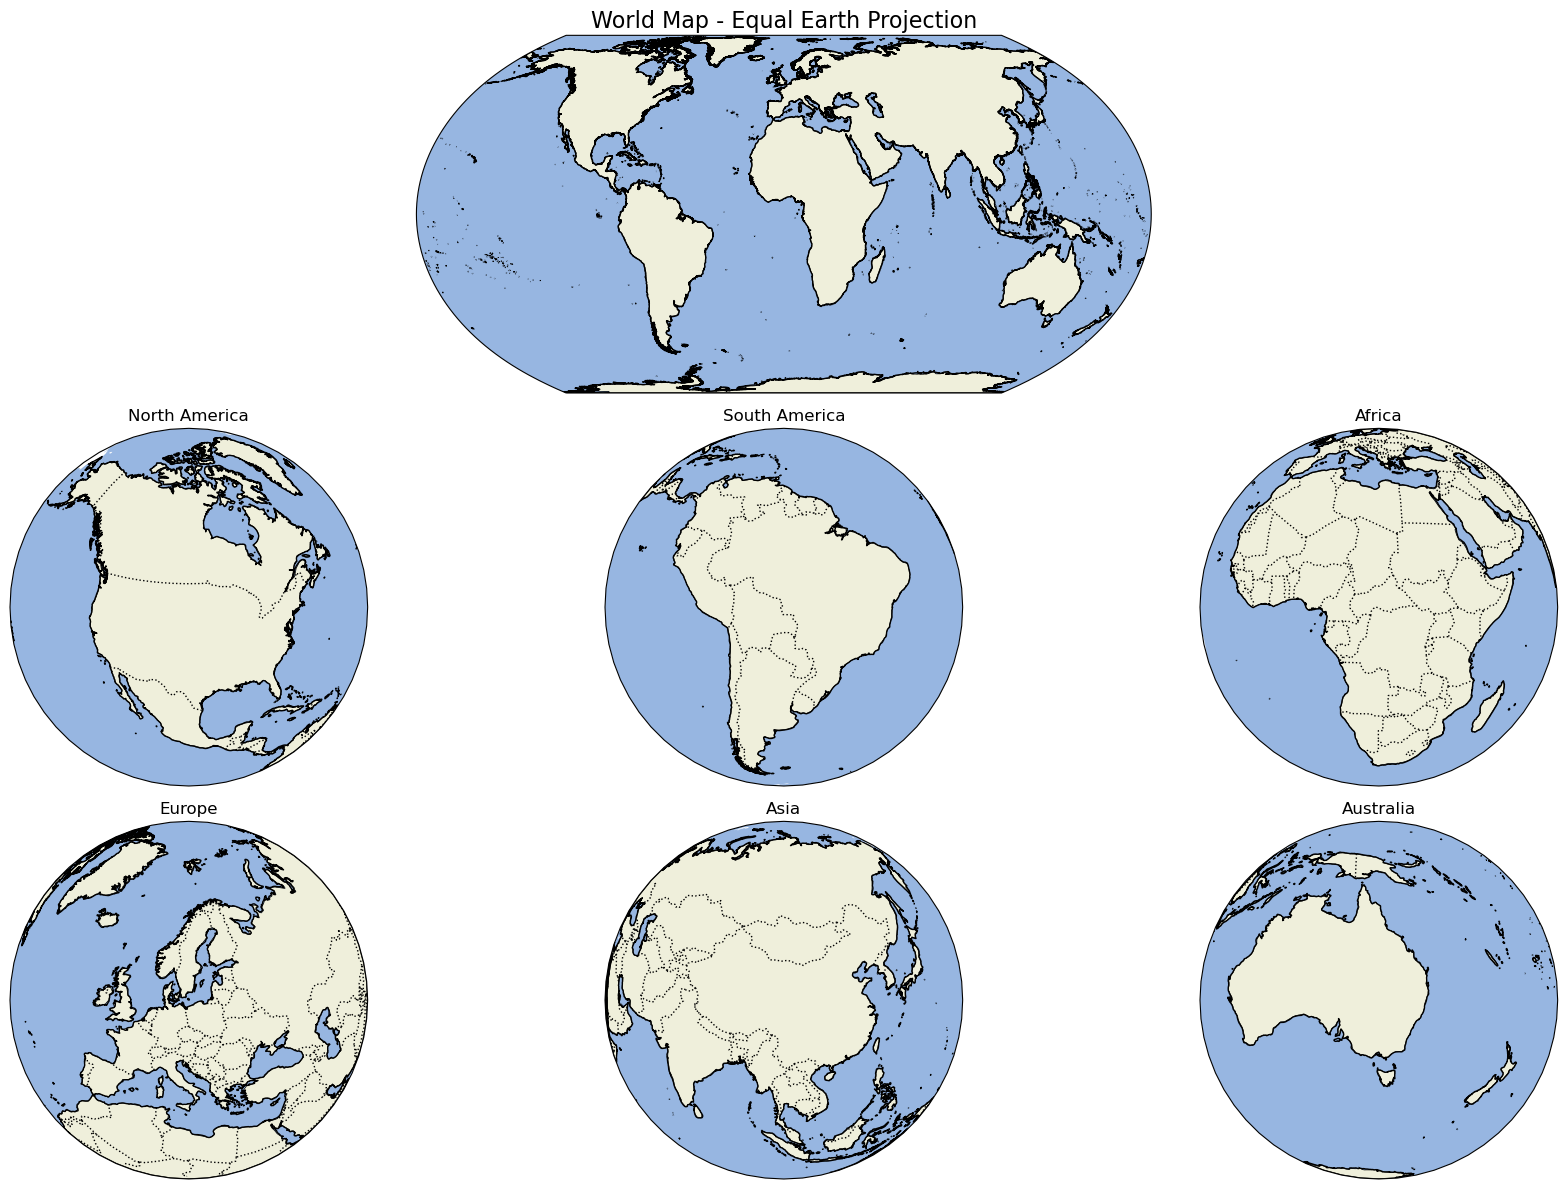

In [3]:
# Create the figure
fig = plt.figure(figsize=(18, 12))

# World map with Equal Earth projection spanning the top
ax1 = fig.add_subplot(3, 1, 1, projection=ccrs.EqualEarth())
ax1.set_global()
ax1.coastlines(resolution='10m')
ax1.set_title('World Map - Equal Earth Projection', fontsize=16)
ax1.add_feature(cfeature.LAND, edgecolor='black')
ax1.add_feature(cfeature.OCEAN)

# Plot continental shelves on the world map
# We'll use depths between -200m and 0m to represent continental shelves
# gebco_data.elevation.plot.contourf(
#     ax=ax1,
#     transform=ccrs.PlateCarree(),
#     levels=[-200, 0],
#     colors='lightblue',
#     add_colorbar=False,
#     add_labels=False
#)

# Define the central coordinates and satellite heights for each continent
continent_settings = [
    ('North America', -100, 45, 5000000),    # (name, central_lon, central_lat, satellite_height in meters)
    ('South America', -60, -15, 5000000),
    ('Africa', 20, 5, 7000000),
    ('Europe', 15, 55, 3500000),
    ('Asia', 100, 35, 7000000),
    ('Australia', 145, -30, 3500000)
]

# Create subplots for the continents below the world map (2 rows, 3 columns)
for i, (continent, central_lon, central_lat, satellite_height) in enumerate(continent_settings):
    ax = fig.add_subplot(3, 3, i + 4, projection=ccrs.NearsidePerspective(
        central_longitude=central_lon,
        central_latitude=central_lat,
        satellite_height=satellite_height
    ))
    ax.coastlines(resolution='50m')
    ax.set_title(continent, fontsize=12)
    
    # Add features
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # No need to set extent; NearsidePerspective handles zooming via satellite_height

# Adjust layout and display the plot
plt.tight_layout()

plt.savefig('sandbox_map_continents.png')


In [4]:
# get rid of everything poleward of 75
# flatten the projection to reduce the size of the land

In [5]:
gebco_data

<xarray.Dataset>
Dimensions:    (lon: 86400, lat: 43200)
Coordinates:
  * lon        (lon) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * lat        (lat) float64 -90.0 -89.99 -89.99 -89.99 ... 89.99 89.99 90.0
Data variables:
    crs        |S1 ...
    elevation  (lat, lon) int16 ...
Attributes: (12/36)
    title:                           The GEBCO_2024 Grid - a continuous terra...
    summary:                         The GEBCO_2024 Grid is a continuous, glo...
    keywords:                        BATHYMETRY/SEAFLOOR TOPOGRAPHY, DIGITAL ...
    Conventions:                     CF-1.6, ACDD-1.3
    id:                              DOI: 10.5285/1c44ce99-0a0d-5f4f-e063-708...
    naming_authority:                https://dx.doi.org
    ...                              ...
    geospatial_vertical_units:       meters
    geospatial_vertical_resolution:  1.0
    geospatial_vertical_positive:    up
    identifier_product_doi:          DOI: 10.5285/1c44ce99-0a0d-5f4f-e063-708...
    references:                      DOI: 10.5285/1c44ce99-0a0d-5f4f-e063-708...
    node_offset:                     1.0

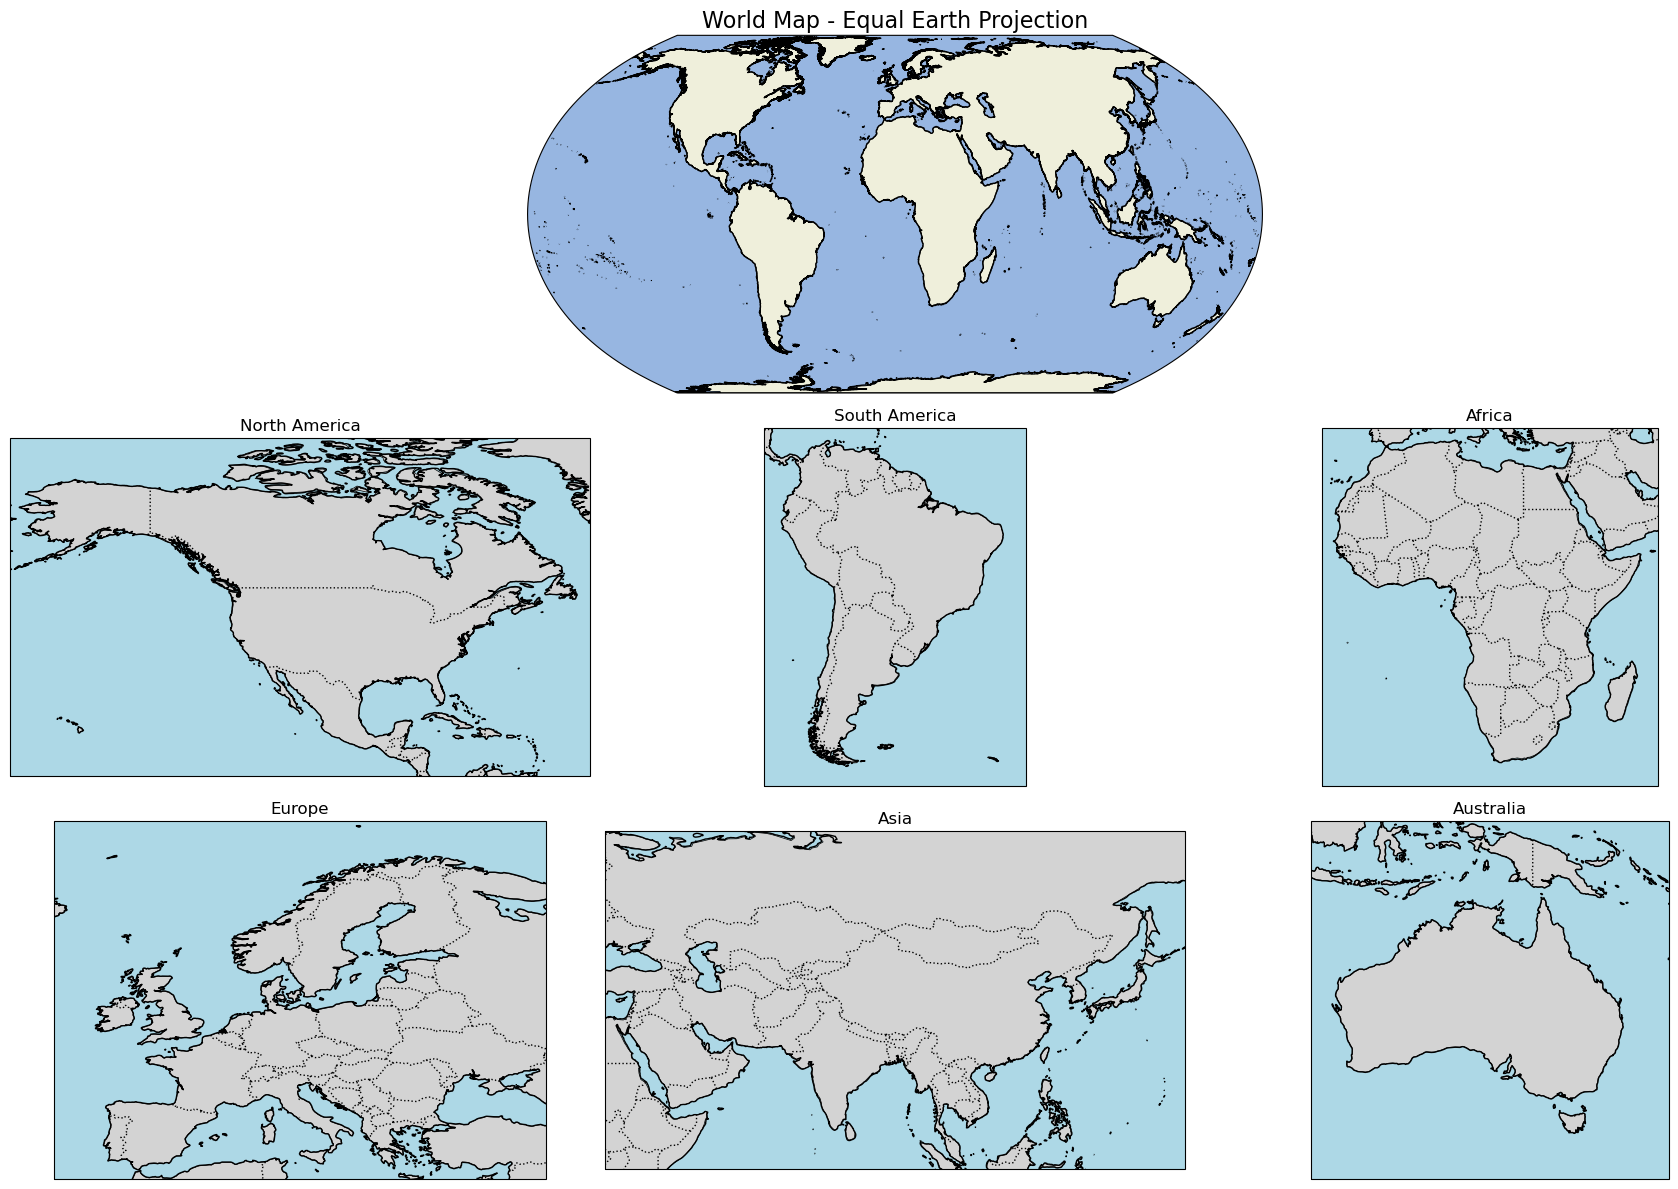

In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create the figure
fig = plt.figure(figsize=(18, 12))

# World map with Equal Earth projection spanning the top
ax1 = fig.add_subplot(3, 1, 1, projection=ccrs.EqualEarth())
ax1.set_global()
ax1.coastlines(resolution='10m')
ax1.set_title('World Map - Equal Earth Projection', fontsize=16)
ax1.add_feature(cfeature.LAND, edgecolor='black')
ax1.add_feature(cfeature.OCEAN)

# Plot continental shelves on the world map (optional)
# Uncomment the following lines if you have the GEBCO data loaded
# gebco_data.elevation.plot.contourf(
#     ax=ax1,
#     transform=ccrs.PlateCarree(),
#     levels=[-200, 0],
#     colors='lightblue',
#     add_colorbar=False,
#     add_labels=False
# )

# Define the extent for each continent (lon_min, lon_max, lat_min, lat_max)
continent_settings = [
    ('North America', -170, -50, 10, 80),
    ('South America', -85, -30, -60, 15),
    ('Africa', -20, 55, -40, 40),
    ('Europe', -15, 40, 35, 75),
    ('Asia', 30, 150, 0, 70),
    ('Australia', 110, 160, -50, 0)
]

# Create subplots for the continents below the world map (2 rows, 3 columns)
for i, (continent, lon_min, lon_max, lat_min, lat_max) in enumerate(continent_settings):
    ax = fig.add_subplot(3, 3, i + 4, projection=ccrs.PlateCarree())
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m')
    ax.set_title(continent, fontsize=12)
    
    # Add features
    ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Optionally, plot continental shelves if you have the GEBCO data
    # bathy_subset = gebco_data.sel(
    #     longitude=slice(lon_min, lon_max),
    #     latitude=slice(lat_min, lat_max)
    # )
    # bathy_subset.elevation.plot.contourf(
    #     ax=ax,
    #     transform=ccrs.PlateCarree(),
    #     levels=[-200, 0],
    #     colors='blue',
    #     alpha=0.5,
    #     add_colorbar=False,
    #     add_labels=False
    # )

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('sandbox_map_continents.png')
plt.show()


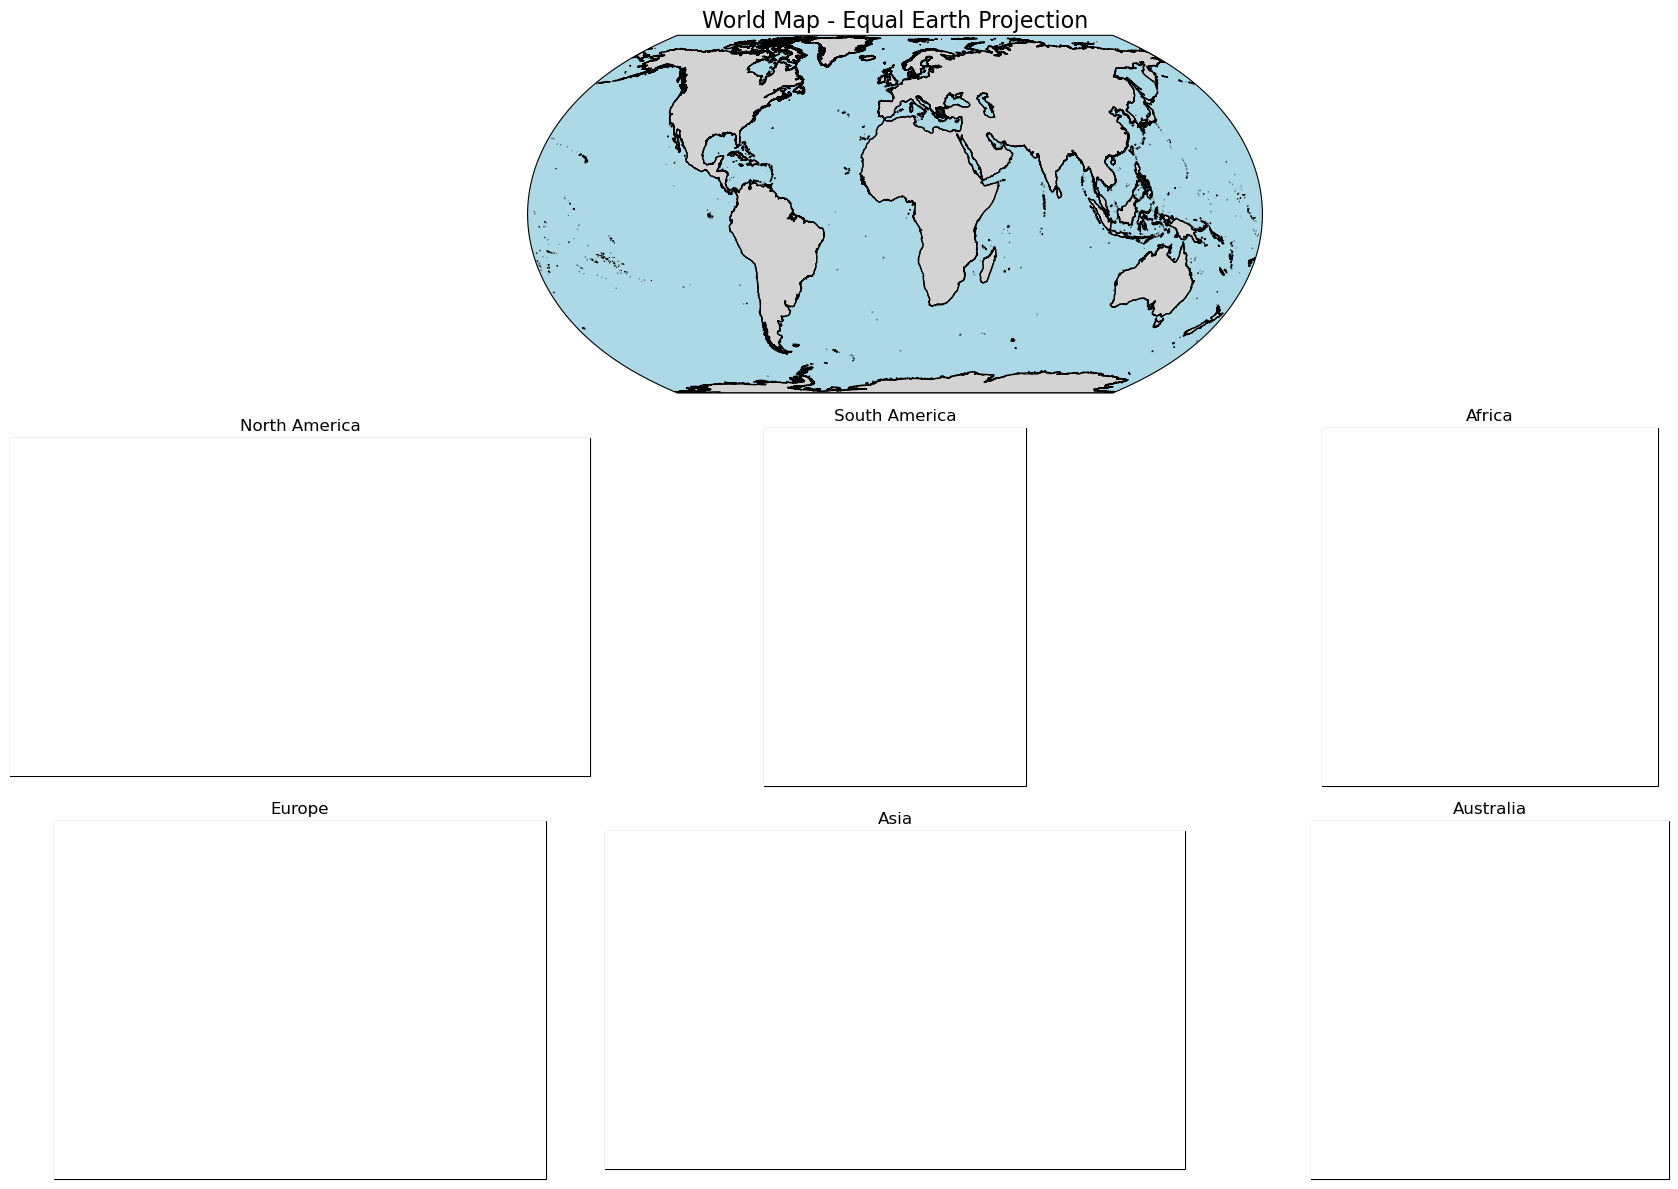

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import FancyBboxPatch
import xarray as xr
import numpy as np

# Load the GEBCO data
# gebco_data = xr.open_dataset('GEBCO_2022.nc')

# Create the figure
fig = plt.figure(figsize=(18, 12))

# World map with Equal Earth projection spanning the top
ax1 = fig.add_subplot(3, 1, 1, projection=ccrs.EqualEarth())
ax1.set_global()
ax1.coastlines(resolution='10m')
ax1.set_title('World Map - Equal Earth Projection', fontsize=16)
ax1.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax1.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot continental shelves on the world map
# gebco_data.elevation.plot.contourf(
#     ax=ax1,
#     transform=ccrs.PlateCarree(),
#     levels=[-200, 0],
#     colors='blue',
#     alpha=0.5,
#     add_colorbar=False,
#     add_labels=False
# )

# Define the extent for each continent (lon_min, lon_max, lat_min, lat_max)
continent_settings = [
    ('North America', -170, -50, 10, 80),
    ('South America', -85, -30, -60, 15),
    ('Africa', -20, 55, -40, 40),
    ('Europe', -15, 40, 35, 75),
    ('Asia', 30, 150, 0, 70),
    ('Australia', 110, 160, -50, 0)
]

# Create subplots for the continents below the world map
for i, (continent, lon_min, lon_max, lat_min, lat_max) in enumerate(continent_settings):
    ax = fig.add_subplot(3, 3, i + 4, projection=ccrs.PlateCarree())
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m')
    ax.set_title(continent, fontsize=12)
    
    # Add features
    ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Optional: Plot continental shelves
    # bathy_subset = gebco_data.sel(
    #     longitude=slice(lon_min, lon_max),
    #     latitude=slice(lat_min, lat_max)
    # )
    # bathy_subset.elevation.plot.contourf(
    #     ax=ax,
    #     transform=ccrs.PlateCarree(),
    #     levels=[-200, 0],
    #     colors='blue',
    #     alpha=0.5,
    #     add_colorbar=False,
    #     add_labels=False
    # )

    # Round the corners on the bottom plots
    ax.patch.set_visible(False)
    fancy = FancyBboxPatch((0, 0), 1, 1,
                           boxstyle="round,pad=0.02,rounding_size=0.05",
                           transform=ax.transAxes,
                           facecolor='white',
                           edgecolor='black',
                           linewidth=1,
                           zorder=100)
    ax.add_patch(fancy)
    ax.set_clip_path(fancy)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('sandbox_map_continents_rounded.png')
plt.show()
